In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving blogs.csv to blogs.csv


In [20]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


# Task 1: Data Exploration and Preprocessing

In [5]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [6]:
df.tail()

,Data,Labels
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1999,Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...,talk.religion.misc


In [7]:
df.isnull().sum()

,0
Data,0
Labels,0


In [8]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [9]:
# Download NLTK stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
# Define a function to preprocess the text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join tokens back to string
    return ' '.join(tokens)

In [11]:
# Apply the preprocessing function to the text data
df['Data'] = df['Data'].apply(preprocess_text)

In [12]:
# Display the first few rows of the preprocessed dataset
print(df.head())

                                                Data       Labels
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism
1  newsgroups altatheism path cantaloupesrvcscmue...  alt.atheism
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  alt.atheism
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  alt.atheism


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X = vectorizer.fit_transform(df['Data'])

# Display the shape of the resulting feature matrix
print(X.shape)

(2000, 5000)


Task 2: Naive Bayes Model for Text Classification

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Labels'], test_size=0.2, random_state=42)

# Display the shape of the training and test sets
print(X_train.shape, X_test.shape)

(1600, 5000) (400, 5000)


In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training set
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)


In [16]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [17]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8225
Precision: 0.8276176687627891
Recall: 0.8225
F1-score: 0.8171026916205228
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.87        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62     

Task 3: Sentiment Analysis

In [18]:
from textblob import TextBlob

# Define a function to get the sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment function to the text data
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Display the first few rows of the dataset with sentiments
print(df.head())

                                                Data       Labels Sentiment
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism  positive
1  newsgroups altatheism path cantaloupesrvcscmue...  alt.atheism  negative
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  alt.atheism  positive
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism  positive
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  alt.atheism  positive


Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   35.0      0.0      65.0
comp.graphics                 28.0      0.0      72.0
comp.os.ms-windows.misc       24.0      0.0      76.0
comp.sys.ibm.pc.hardware      19.0      0.0      81.0
comp.sys.mac.hardware         26.0      0.0      74.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                  21.0      0.0      79.0
rec.autos                     24.0      0.0      76.0
rec.motorcycles               28.0      0.0      72.0
rec.sport.baseball            35.0      0.0      65.0
rec.sport.hockey              40.0      0.0      60.0
sci.crypt                     19.0      0.0      81.0
sci.electronics               25.0      0.0      75.0
sci.med                       34.0      0.0      66.0
sci.space                     28.0      0.0      72.0
soc.religion.christian        25.0      0.0      75.0
talk.politics.guns          

Text(0, 0.5, 'Count')

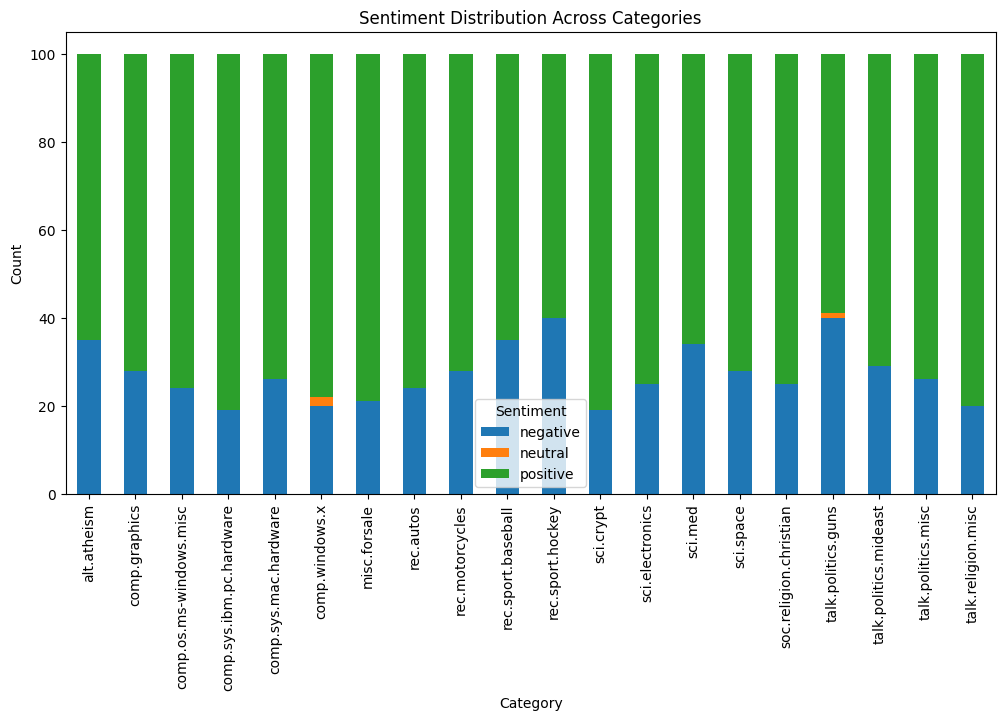

In [21]:
# Group by category and sentiment, and count the occurrences
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

# Display the sentiment distribution
print(sentiment_distribution)

# Plot the sentiment distribution
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')

Task 4: Evaluation

Accuracy: The proportion of correctly classified instances out of the total instances.
Precision: The proportion of true positive instances out of all instances classified as positive.
Recall: The proportion of true positive instances out of all actual positive instances.
F1-Score: The harmonic mean of precision and recall, which balances both metrics.
Confusion Matrix: A matrix showing the counts of true positives, true negatives, false positives, and false negatives.

Class Imbalance

Imbalance Issues: If the dataset has imbalanced classes (e.g., more blog posts in one category than another), Naive Bayes may be biased towards the majority class. This imbalance can lead to misleading performance metrics and poor classification of minority classes.

Feature Engineering

Feature Selection: The quality of feature extraction (e.g., TF-IDF) impacts the performance. Poor feature selection or inadequate preprocessing (e.g., ignoring stopwords, stemming) can degrade the model's effectiveness.

# Blog Post Classification and Sentiment Analysis

#1. Data Exploration and Preprocessing
#Overview of the dataset
#Data cleaning and preprocessing steps
#Feature extraction using TF-IDF

#2. Naive Bayes Model for Text Classification
#Splitting the data
#Implementing the Naive Bayes classifier
#Evaluation of the classifier (accuracy, precision, recall, F1-score)

# 3. Sentiment Analysis
#Method used for sentiment analysis
#Sentiment distribution across categories

#4. Evaluation and Discussion
#Performance of the Naive Bayes classifier
#Challenges encountered
#Insights from the sentiment analysis

#Conclusion
#Summary of findings
#Recommendations for future work